#                                 Martingale Based Anomaly Detection - Milestone#3 

###                                               (Group Name: Anomaly_9_Victoria)

####                                   Group Members : Melissa Curran, Alexander Dubitskiy, Deepika Sinha, Liangliang Zhang

References: Labs, Lectures, Google, Yahoo, Papers


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import scipy as sp
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm  
%matplotlib inline

/Users/melissacurran/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 1. Data Exploration

We have used a data set containing daily closing values for the S&P 500 stock market index from Yahoo for exploration purposes to understand the common techniques used in time series analysis and understand the general shape of the data. The objective is to explore some of the basic ideas and concepts of time series analysis and to visualize typical anomalies. This will help us understand the application of time series models in the real world. We have explored all three types of anomalies, as stated below, using the stock market data from Yahoo. We have performed the preliminary analysis of the index fluctuation on a daily, monthly, and yearly basis. 

#### 1.1. Examples of Anomalies in the Stock Market (S&P 500 Data)

Shown below are summary statistics of the data from one stock on June 30, 2016.

In [2]:
# example of point anomaly S&P500 index
sp500_df = data.get_data_yahoo('^GSPC', datetime(2016, 6, 1), datetime(2016, 6, 30))
sp500_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,2083.469543,2093.831815,2072.063671,2083.891368,3.947850e+09,2083.891368
std,27.405400,23.674602,31.387086,29.188962,1.005225e+09,29.188962
min,2006.670044,2031.449951,1991.680054,2000.540039,3.168160e+09,2000.540039
25%,2075.847534,2082.387512,2063.155090,2072.455017,3.448375e+09,2072.455017
50%,2090.750000,2100.184936,2080.739991,2087.174926,3.553390e+09,2087.174926
75%,2103.065064,2108.492554,2089.617493,2103.777527,4.121248e+09,2103.777527
max,2115.649902,2120.550049,2112.709961,2119.120117,7.597450e+09,2119.120117


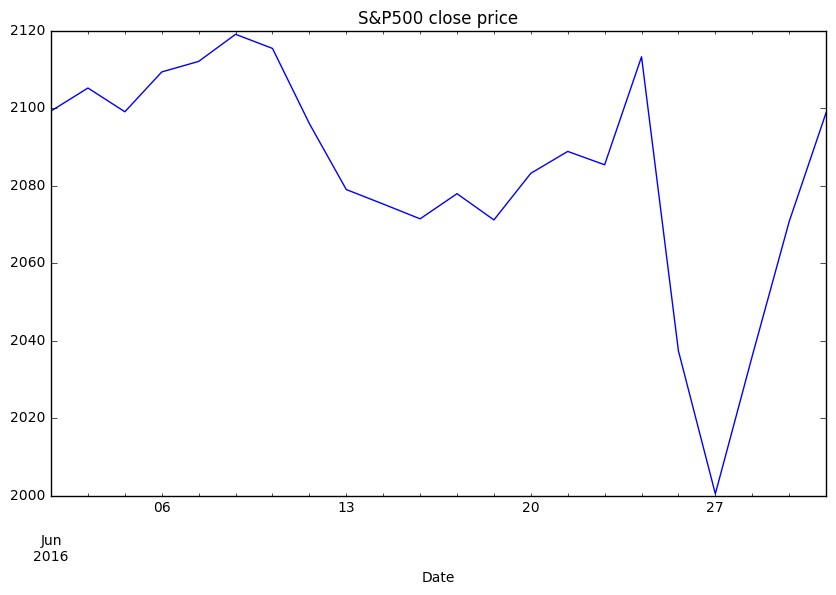

In [3]:
sp500_df['Close'].plot(title = 'S&P500 close price', figsize = (10, 6))

A significant drop on the 27th of June 2016 might be considered as a point anomaly. It just looks too far from the other points. There may be very little correlation between the change in value from one day to the next. 

#### 1.2. Examples of Anomalies in the Stock Market (Insulet Data)

Shown below are summary statistics of the data from another stock between January 1, 2016 and August 30, 2016.

In [4]:
# Example of a contextual anomaly
podd_df = data.get_data_yahoo('PODD', datetime(2016, 1, 1), datetime(2016, 8, 30))
podd_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000
mean,32.917066,33.530898,32.249760,32.915389,5.455323e+05,32.915389
std,4.434791,4.423837,4.432509,4.454675,4.516694e+05,4.454675
min,25.059999,25.059999,23.940001,24.680000,1.580000e+05,24.680000
25%,30.255000,30.705000,29.540000,30.149999,3.230000e+05,30.149999
50%,32.240002,32.939999,31.719999,32.189999,4.444000e+05,32.189999
75%,34.350000,34.935000,33.470000,34.350001,5.848500e+05,34.350001
max,44.750000,45.189999,43.910000,44.500000,3.943100e+06,44.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x114fc1b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11aa28e50>], dtype=object)

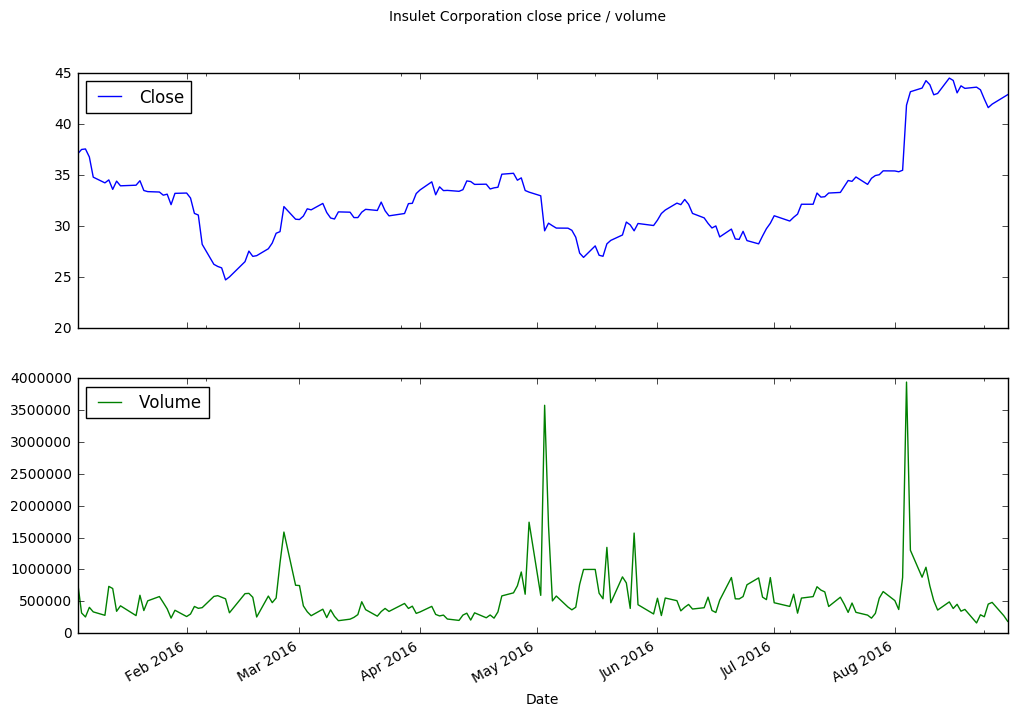

In [5]:
podd_df[['Close', 'Volume']].plot(
    title = 'Insulet Corporation close price / volume', figsize = (12, 8), subplots = True)

A volume spike signifies interest by investors (or trading algorithms), often related to buy orders when the price is significantly low, or sell orders when the price is high. In this particular case these spikes occur when Insulet's quarterly earnings reports were released. We would expect that that big changes in the volume usually happen during sudden changes in the price. Could we consider no changes in volume during Feb 2016 an anomaly? There was a large price drop but almost no change in the trading volume (or should we say no change in the trading volume in the context of a large price drop).

#### 1.3. Examples of Anomalies in the Stock Market (Apple Data)

Shown below are summary statistics of the data from another stock between January 1, 2000 and November 1, 2016.

In [6]:
# collective anomaly
aapl_df = data.get_data_yahoo('AAPL', datetime(2000, 1, 1), datetime(2016, 11, 1))
aapl_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,4236.000000,4236.000000,4236.000000,4236.000000,4.236000e+03,4236.000000
mean,171.095849,172.997546,168.962569,171.013332,1.309192e+08,34.919901
std,174.346135,175.735994,172.677944,174.227005,9.971002e+07,37.851966
min,12.990000,13.190000,12.720000,13.120000,9.835000e+06,0.853595
25%,38.807500,39.187499,38.185000,38.677501,6.444812e+07,3.164590
50%,105.865002,107.435001,104.625000,105.890004,1.022399e+08,17.441454
75%,227.437508,229.135004,224.377498,227.077494,1.688330e+08,61.705698
max,702.409988,705.070023,699.569977,702.100021,1.855410e+09,128.520900


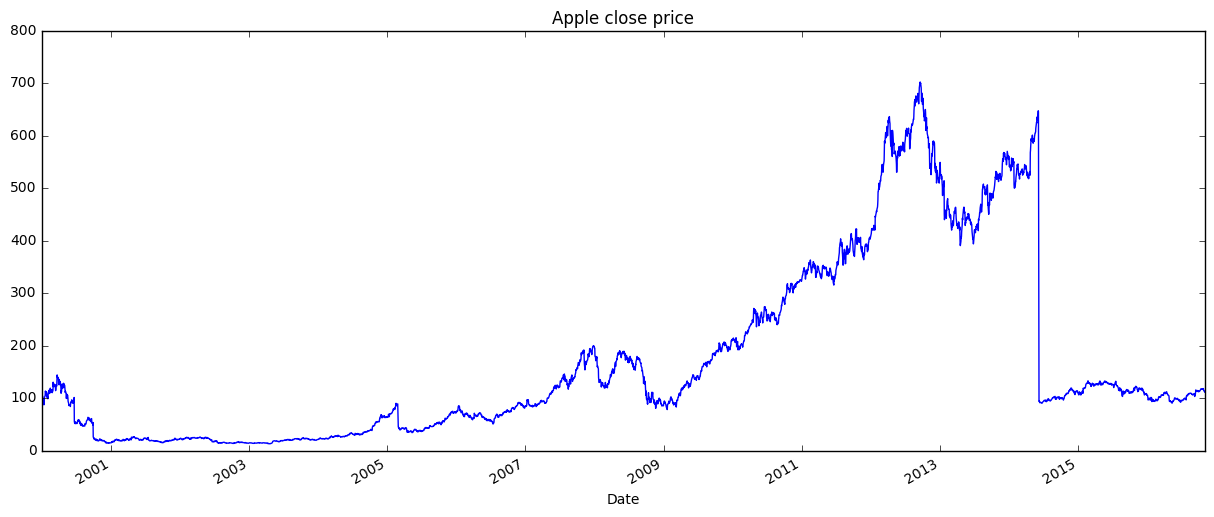

In [7]:
aapl_df['Close'].plot(title = 'Apple close price', figsize = (15, 6))

There are a couple of interesting areas there I think. The price drop in 2015 might be considered a point anomaly. But also interesting is the price rise and drop pattern in around 2013. It does not look right there because it broke the well-defined upward trend. I guess we could consider it an example of a collective anomaly.

#### 1.4. Data Exploration Conclusion

I think we should aim towards detecting point anomalies as a priority considering the project restrictions. It might be possible to get into the context anomalies using multi-dimensional data as well. I think the collective anomalies will probably be out of reach for as (but we could try something simple like moving averages, etc.). Let's see if we could assess how difficult it is to detect anomalies using a simple distance-based approach.

### 2. Preliminary Anomaly Detection Attempts

#### 2.1. Type of Anomalies

**Point Anomalies:** This is the simplest type of anomaly and is the focus of majority of research on anomaly detection. As a real life example, consider credit card fraud detection. Let the data set
correspond to an individual's credit card transactions

**Contextual Anomalies:** If a data instance is anomalous in a specific context (but not otherwise), then it is termed as a contextual anomaly (also referred to as conditional anomaly. Contextual anomalies have been most commonly explored in time-series data. One such example for a temperature time series which shows the monthly temperature of an area over last few years.
 
**Collective Anomalies:** If a collection of related data instances is anomalous with respect to the entire data set, it is termed as a collective anomaly.

#### 2.2. Functions Written

In [8]:
# strangeness measure
# calculates distances from the last point to every other point in the set
# sorts ascending
# takes k fist distances (smallest) and sums
def knn_distance(X, k = 2):
    return np.sum(np.sort(np.abs(X[ : -1 ] - X[-1]))[ : k])

In [9]:
# p value calculated as suggested in 'Testing Exchangeability On-Line'
def calculate_pvalue(A):
    return (float(np.sum(A > A[-1])) + np.random.uniform()* float(np.sum(A == A[-1])))/float(A.size)

In [10]:
# maringale calculated as suggested in 'Testing Exchangeability On-Line'
# parameter e has to be estimated, between 0.0 and 1.0
def calculate_martingale(P, e):
    return np.prod(e*np.power(P, e - 1.0))

In [11]:
# calulates strangeness, p-values and martingale values
# df - data frame to abalyse
# column - column to analyse (just one expected)
# k - same as in knn_distance
# e - same as in calculate martingale
def analyse_df(df, column, k, e):
    column_a = column + '_A'
    df[column_a] = df[column].expanding(min_periods = 1).apply(
        lambda x : knn_distance(x, k))
    column_p = column + '_P'
    df[column_p] = df[column_a].expanding(min_periods = 1).apply(
        lambda a : calculate_pvalue(a))
    column_m = column + '_M'
    df[column_m] = df[column_p].expanding(min_periods = 1).apply(
        lambda p : calculate_martingale(p, e))
    return df

In [12]:
# similar to the above but all calculations are window-bound
def analyse_window_df(df, column, k, e, w_size = 10):
    column_a = column + '_A'
    df[column_a] = df[column].rolling(window = w_size, min_periods = 1).apply(
        lambda x : knn_distance(x, k))
    column_p = column + '_P'
    df[column_p] = df[column_a].rolling(window = w_size, min_periods = 1).apply(
        lambda a : calculate_pvalue(a))
    column_m = column + '_M'
    df[column_m] = df[column_p].rolling(window = w_size, min_periods = 1).apply(
        lambda p : calculate_martingale(p, e))
    return df

In [13]:
# char of the values being analysed and the martingale value
def plot_analysis(df, stock_name, figsize = (15, 6)):
    fig, ax1 = plt.subplots(figsize = figsize)
    ax1.plot(df['Close'], 'b-')
    ax1.set_ylabel(stock_name, color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(df['Close_M'], 'r-')
    ax2.set_ylabel('M', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

#### 2.3. Detection of Anomalies in Statistically Generated Time Series Data

In the following example, we generate a time series data which have three "stages". In the first 25 time point, the data was generated from a random distribution centered at 5.0, and then the data generation model changed to a new random distribution centered at 7.0 for another 5 points, at last the model changed back to the first one. Let's see whether our method can detect the anomaly.

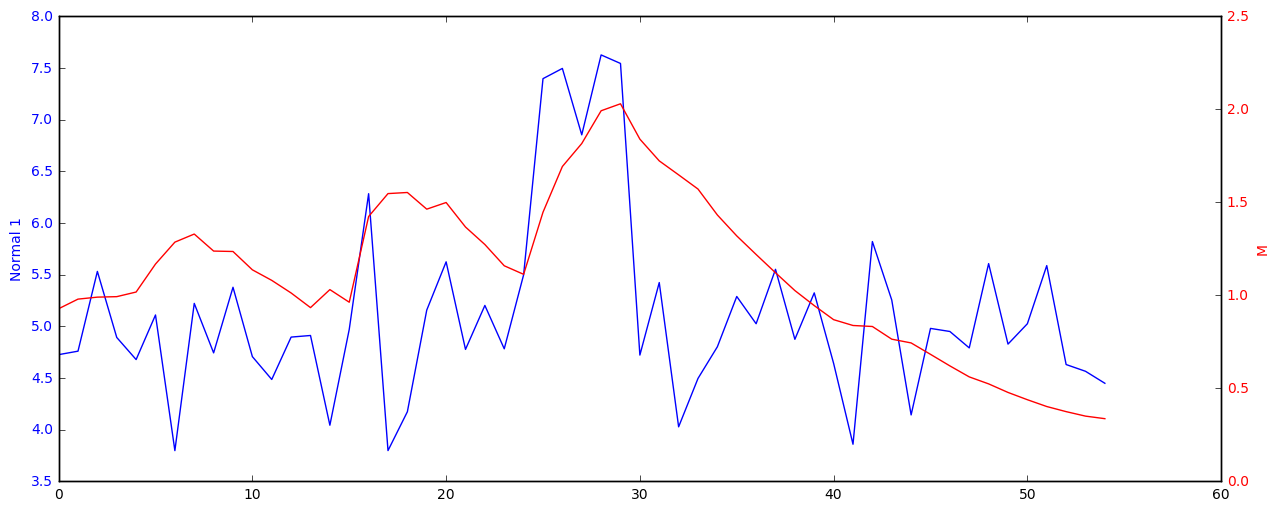

In [14]:
# point anomaly can be modeled as a sudden change in the mean
sample = []
sample.extend(np.random.normal(loc = 5.0, scale = .5, size = 25))
sample.extend(np.random.normal(loc = 7.0, scale = .5, size = 5))
sample.extend(np.random.normal(loc = 5.0, scale = .5, size = 25))
normal_df = pd.DataFrame({ 'Close' : sample })
normal_df = analyse_df(normal_df, 'Close', 5, 0.9)
plot_analysis(normal_df, 'Normal 1')

It looks like the martingale value is not stable at the start, but it also looks like the change was detected. We saw that most of the stocks have trends and they probably should not be considered as anomalies, but lets see how it looks on the generated data.

In the following example, the simulated data has a "upward trend" with the center shifted from 1.0 to 10.0 with time. 

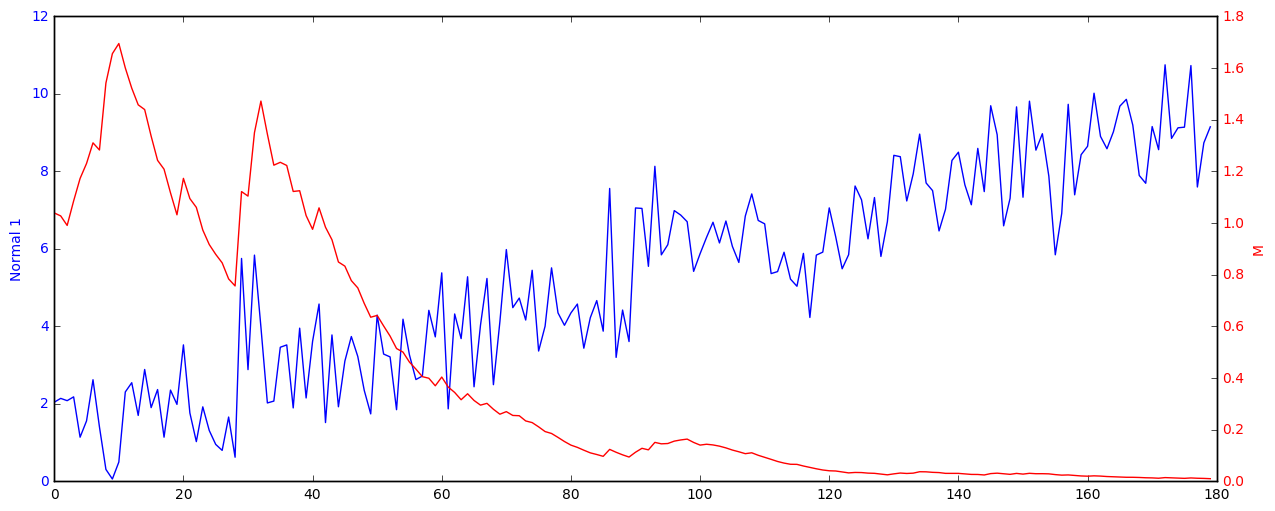

In [15]:
sample = []
for mean in np.arange(1.0, 10.0, 0.5):
    sample.extend(np.random.normal(loc = mean, scale = 1.0, size = 10))
normal_df = pd.DataFrame({ 'Close' : sample })

normal_df =  analyse_df(normal_df, 'Close', 5, 0.9)
plot_analysis(normal_df, 'Normal 1')

It looks like after initial learning, the martingale stabilizes. It could be a good thing but it also could be a bad thing. We would probably like to detect a change in the trend, but it might not happen.

Then we generate a dataset has a "upward trend" followed by a "downward trend" with time.

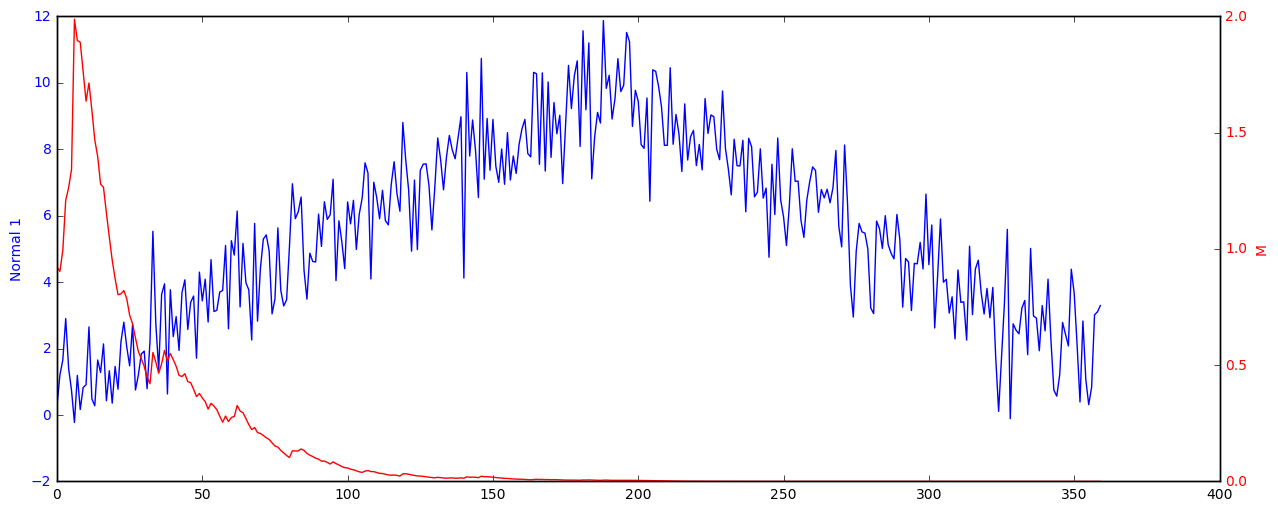

In [16]:
sample = []
for mean in np.arange(1.0, 10.0, 0.5):
    sample.extend(np.random.normal(loc = mean, scale = 1.0, size = 10))
for mean in np.arange(10.0, 1.0, - 0.5):
    sample.extend(np.random.normal(loc = mean, scale = 1.0, size = 10))

normal_df = pd.DataFrame({ 'Close' : sample })

normal_df =  analyse_df(normal_df, 'Close', 5, 0.9)
plot_analysis(normal_df, 'Normal 1')

The martingale remains stable when the "trend change" occurs.

One way to deal with this might be using a window instead of the full sample.

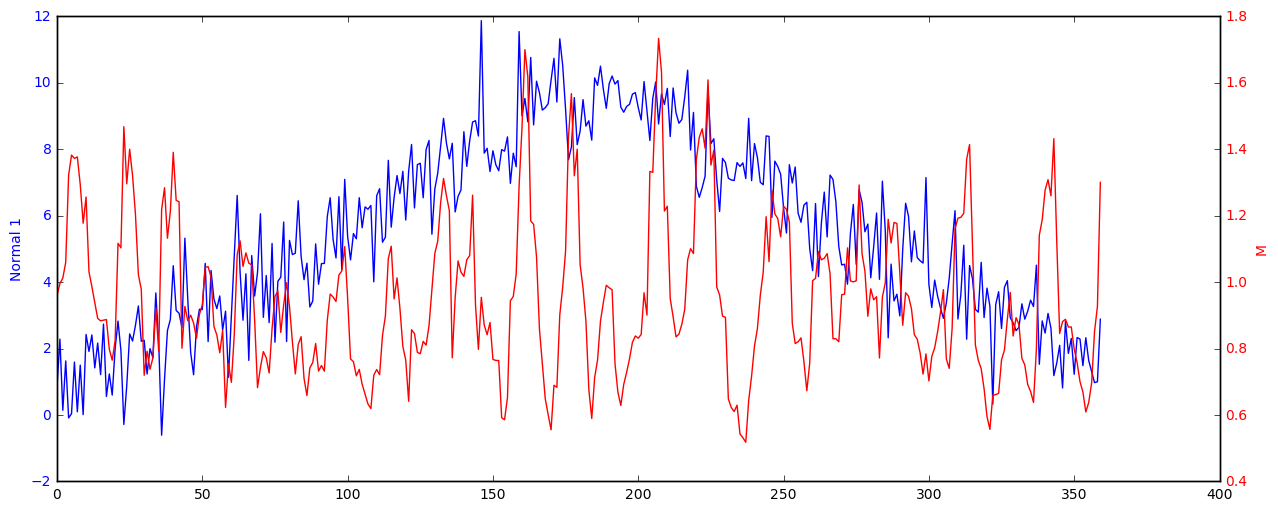

In [17]:
sample = []
for mean in np.arange(1.0, 10.0, 0.5):
    sample.extend(np.random.normal(loc = mean, scale = 1.0, size = 10))
for mean in np.arange(10.0, 1.0, - 0.5):
    sample.extend(np.random.normal(loc = mean, scale = 1.0, size = 10))

normal_df = pd.DataFrame({ 'Close' : sample })

normal_df =  analyse_window_df(normal_df, 'Close', 5, 0.9, 7)
plot_analysis(normal_df, 'Normal 1')

It does not look a lot better but we can tune the window size parameter for the particular dataset. Maybe we'll try to introduce a strangeness measure based on moving average, like ARIMA model.

The next example shows is a sudden change in the variance.

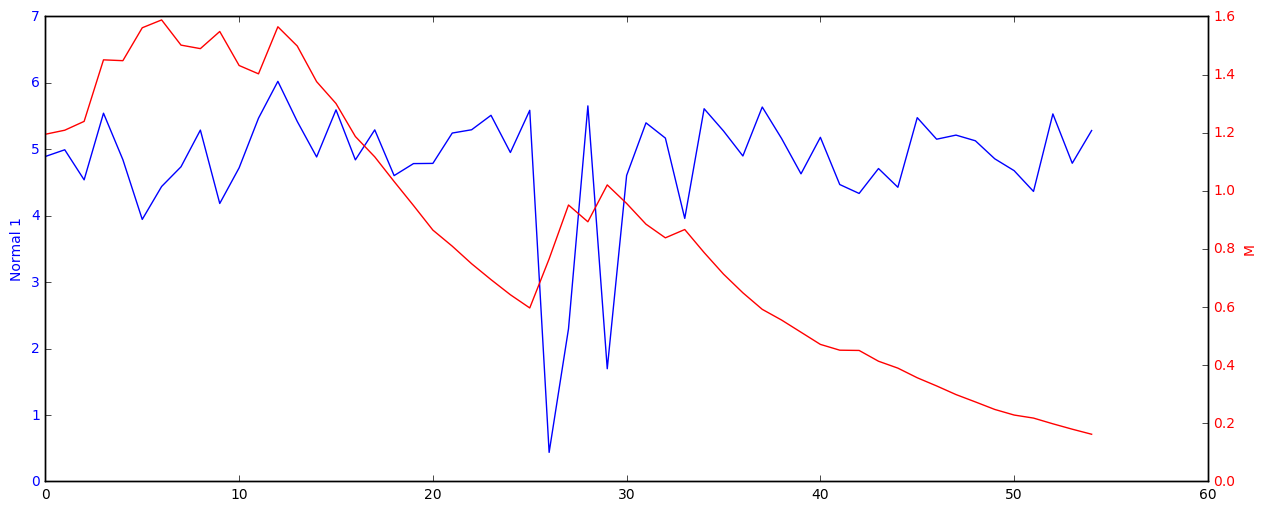

In [18]:
sample = []
sample.extend(np.random.normal(loc = 5.0, scale = .5, size = 25))
sample.extend(np.random.normal(loc = 5.0, scale = 2.5, size = 5))
sample.extend(np.random.normal(loc = 5.0, scale = .5, size = 25))
normal_df = pd.DataFrame({ 'Close' : sample })
normal_df = analyse_df(normal_df, 'Close', 5, 0.9)
plot_analysis(normal_df, 'Normal 1')

It looks not so bad! We will have to look at the performance for the magnitude of the change, but obviously there is a sharp rise in the martingale value.

#### 2.4. Detection of Anomalies in Real Stock Market Data

Below are some examples of applying the analysis to the real stock market data.

##### 2.4.1. Detection of Anomalies in Facebook Stock

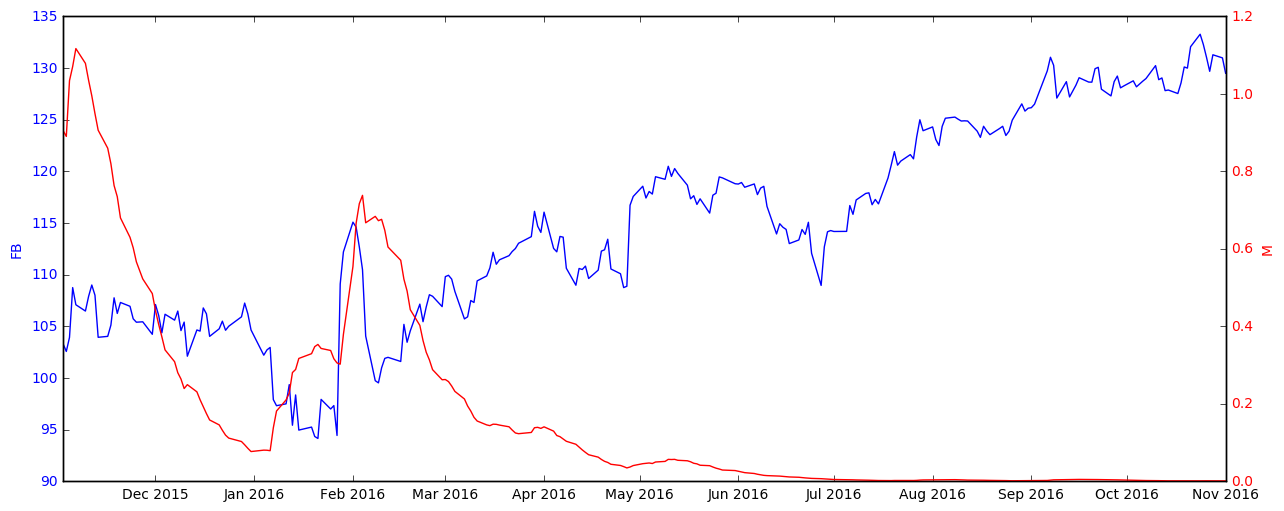

In [19]:
stock_data = analyse_df(
    data.get_data_yahoo('FB', datetime(2015, 11, 1), datetime(2016, 11, 1)), 'Close', 5, 0.9)
plot_analysis(stock_data, 'FB')

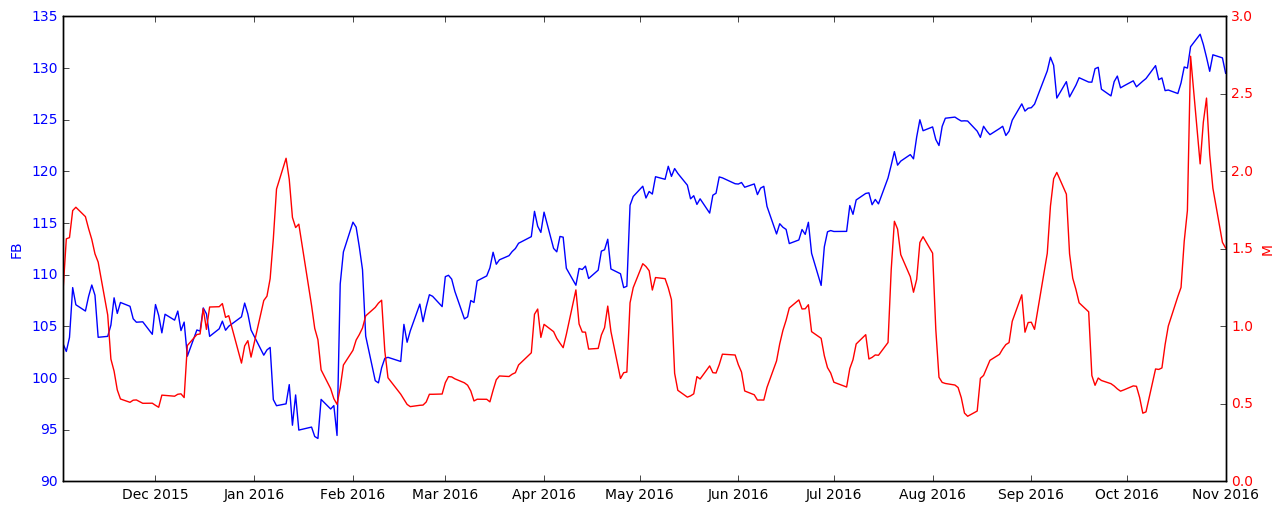

In [20]:
stock_data = analyse_window_df(
    data.get_data_yahoo('FB', datetime(2015, 11, 1), datetime(2016, 11, 1)), 'Close', 5, 0.9)
plot_analysis(stock_data, 'FB')

##### 2.4.2. Detection of Anomalies in Apple Stock

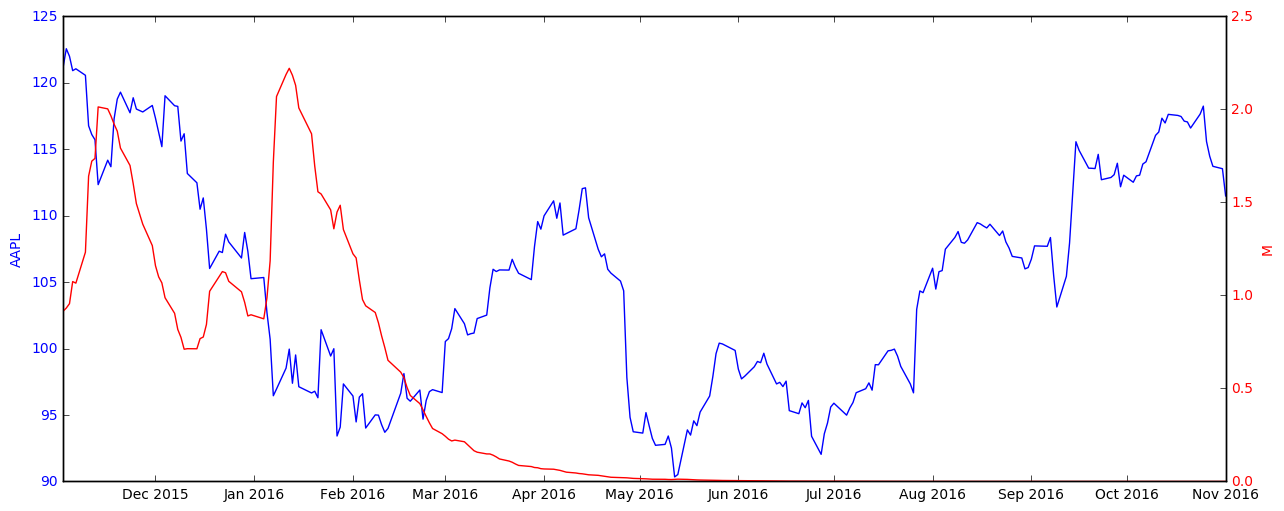

In [21]:
stock_data = analyse_df(
    data.get_data_yahoo('AAPL', datetime(2015, 11, 1), datetime(2016, 11, 1)), 'Close', 5, 0.9)
plot_analysis(stock_data, 'AAPL')

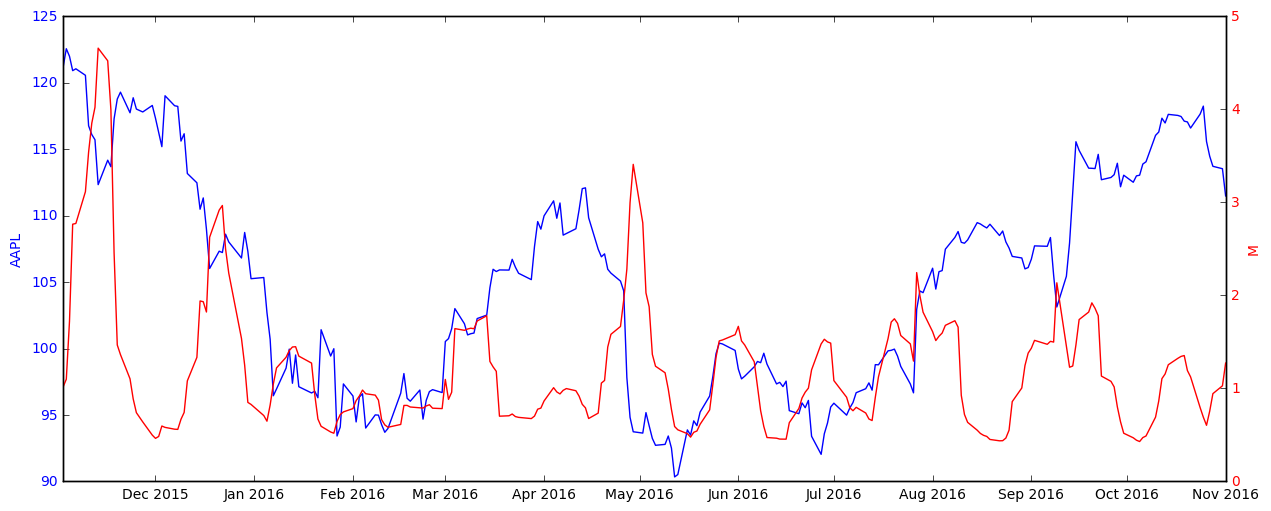

In [22]:
stock_data = analyse_window_df(
    data.get_data_yahoo('AAPL', datetime(2015, 11, 1), datetime(2016, 11, 1)), 'Close', 5, 0.9)
plot_analysis(stock_data, 'AAPL')

### 3. Supervised vs. Unsupervised Learning

We’ve discussed both supervised and unsupervised approaches to the anomaly detection in the time series and came to conclusion that supervised approach is not feasible for us.

We’ve identified the following problems with the supervised learning:
- Training data is not available and not easy to produce.
- Majority of the points are normal and we would need to employ some extra methods to address the imbalance.

We think that unsupervised methods are better suited for our problem and in general much wider studied and available. They allow us to use an unlabeled data set as the training set and they are supposed to be robust even if there is a few anomalies in the training set.

### 4. Next Steps

This is our first attempt to look at the stock market data. 
Ways to improve:
- introduce / analyze performance for different strangeness measures
- try supervised learning
- try a multidimensional approach (close price and volume)